## Red Wine Dataset and Analysis
#### by Lauren Miller

#### The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

In [71]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 4) #adjusting plot size

#read in data

df = pd.read_csv(r'/Users/laurenmiller/Documents/Personal Projects/winequality-red.csv')
df.head().style.set_properties(**{'background-color': '#F6FBFC','color': '#000','border': '1px solid #000000'})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


In [72]:
#null values in the data frame

for col in df.columns:
    pct_missing = np.mean(np.mean(df[col].isnull()))
    print(f'{col} - {pct_missing}%')
    
#no data is missing from the columns

fixed acidity - 0.0%
volatile acidity - 0.0%
citric acid - 0.0%
residual sugar - 0.0%
chlorides - 0.0%
free sulfur dioxide - 0.0%
total sulfur dioxide - 0.0%
density - 0.0%
pH - 0.0%
sulphates - 0.0%
alcohol - 0.0%
quality - 0.0%


In [73]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [74]:
df.shape

(1599, 12)

In [75]:
#from dataset notes we know: 
#when wine in above 6.5 for quality rating it is 'good'
#when wne is below 6.5 for quality rating it is 'bad'

#filter wine to create a new column that labels wine as 'good wine' or 'bad wine'

def quality_wine_rating(quality):
    try:
        if quality > 6.5: 
            return 'good wine'
        else: 
            return 'bad wine'
    except ValueError:
        return None

#goodorbad quality type
df['goodorbad'] = df['quality'].apply(quality_wine_rating)
df.head().style.set_properties(**{'background-color': '#F6FBFC','color': '#000','border': '1px solid #000000'})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodorbad
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,bad wine
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5,bad wine
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5,bad wine
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6,bad wine
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,bad wine


In [76]:
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)

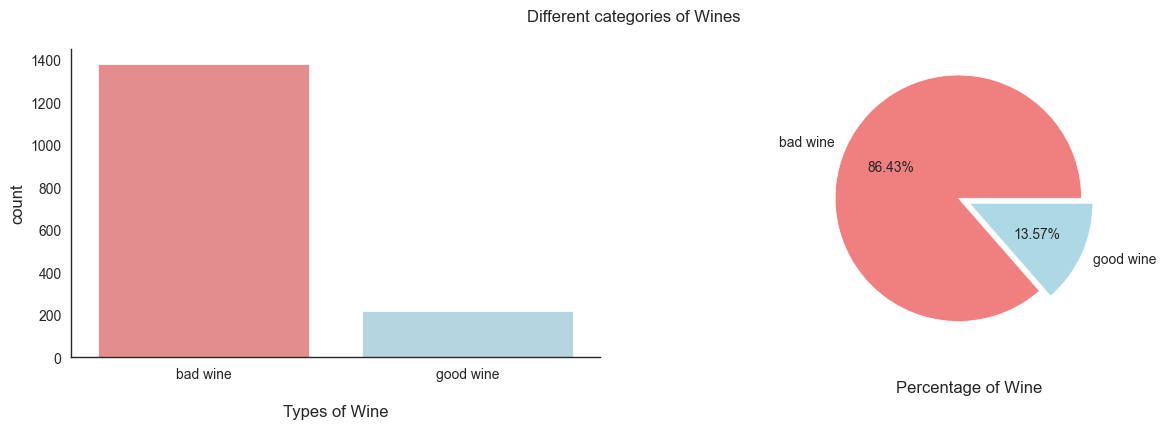

In [113]:
sns.set_style("white")

#
wine_insight = df['quality']
wine_insight_pct = (wine_insight/wine_insight.sum()) 


# Set up the palette if needed
palette = ['lightcoral', 'lightblue']

# Create subplots
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=wine_insight, palette=palette)
plt.xticks([0, 1], ['bad wine', 'good wine'])
plt.xlabel("\nTypes of Wine")

plt.subplot(1, 2, 2)
plt.pie(wine_insight.value_counts(), labels=['bad wine', 'good wine'], autopct="%.2f%%", explode=[0.1, 0], colors=['lightcoral', 'lightblue'])
plt.xlabel("\nPercentage of Wine")

# Set the title for the entire plot
plt.suptitle('Different categories of Wines')

# Remove unnecessary spines
sns.despine()

# Show the plot
plt.show()


In [148]:
#make function to visualize data

def wine_visuals(field):
    plt.figure(figsize=(15, 5))
    sns.histplot(data=df, x=field, hue='quality', kde=True, palette=palette, bins=20, multiple='stack', alpha=0.3)
    plt.legend(['bad wine', 'good wine'])
    plt.title(f'\n{field.capitalize()} contents in red wine\n\n')

    plt.figtext(0.75, 0.3, f'{df[field].describe()}')
    sns.despine()
    

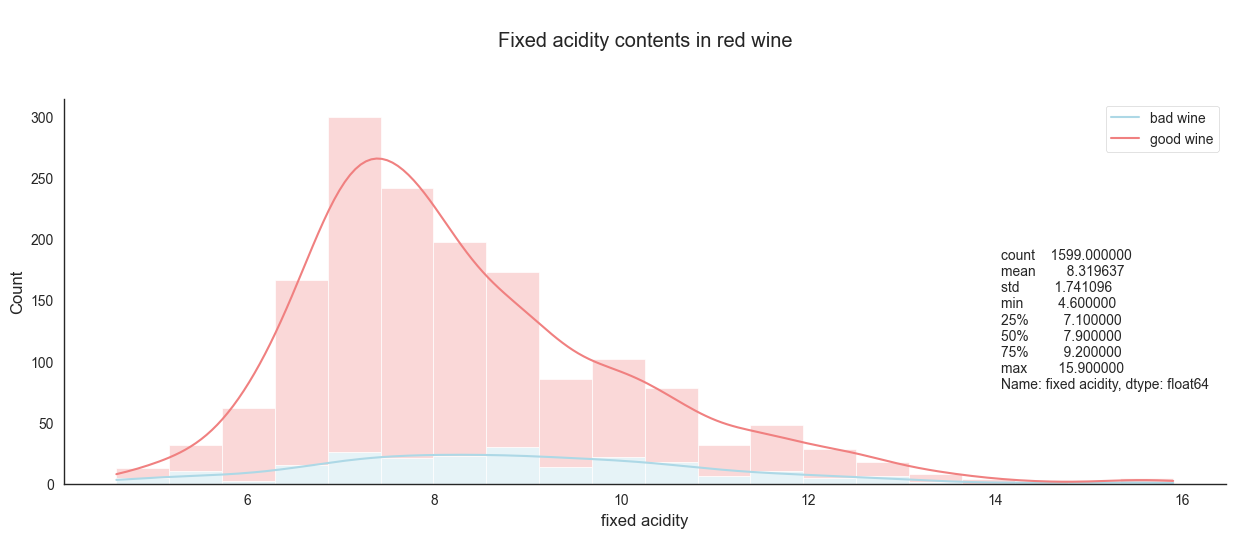

In [149]:
wine_visuals("fixed acidity")

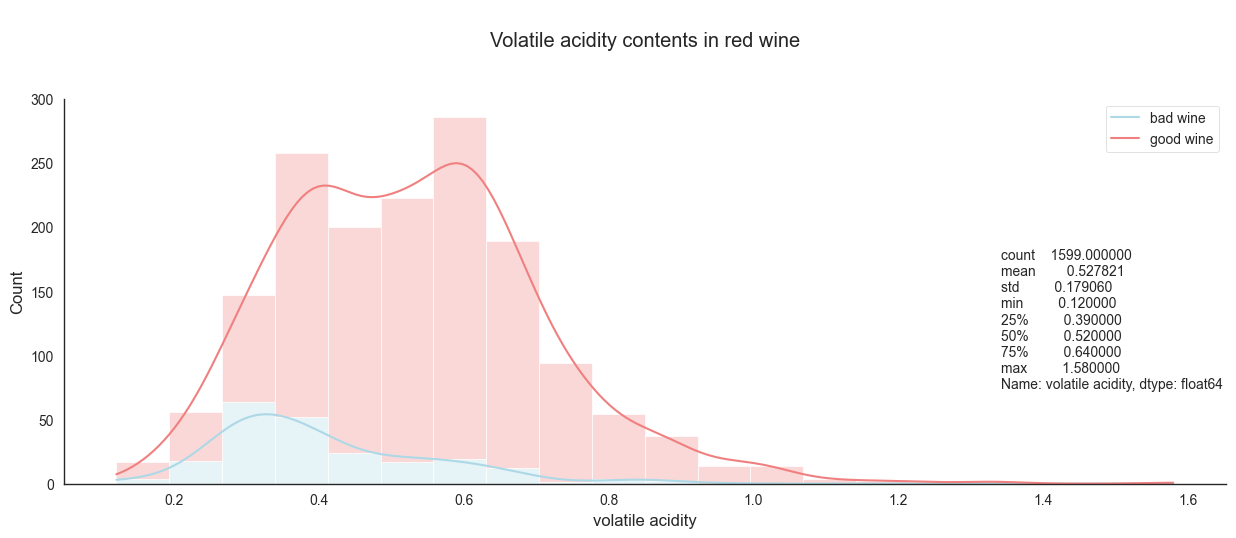

In [150]:
wine_visuals("volatile acidity")

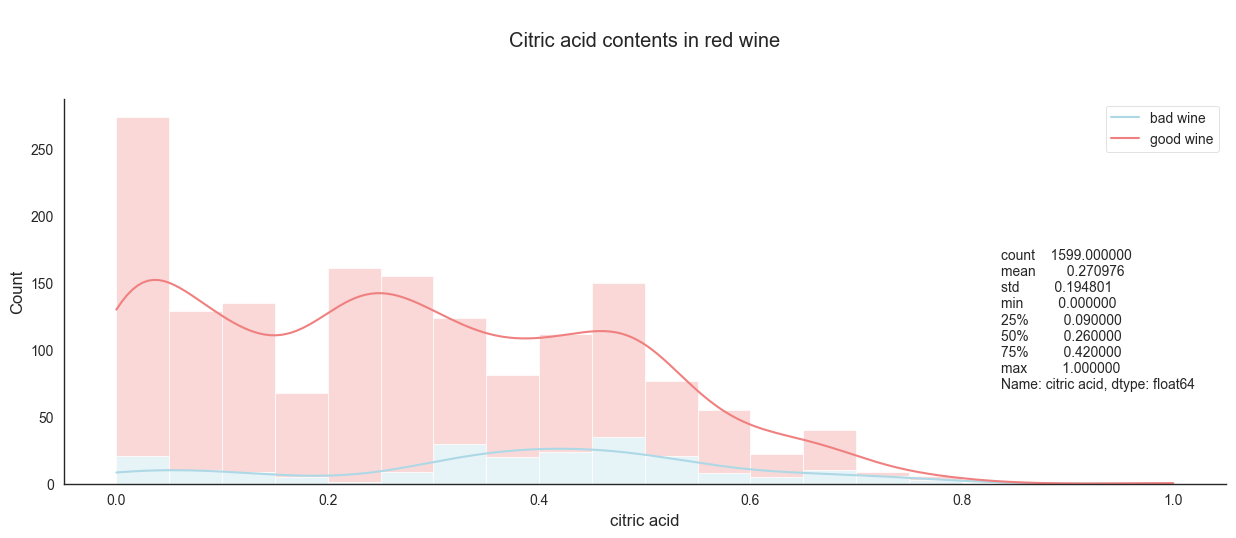

In [151]:
wine_visuals("citric acid")

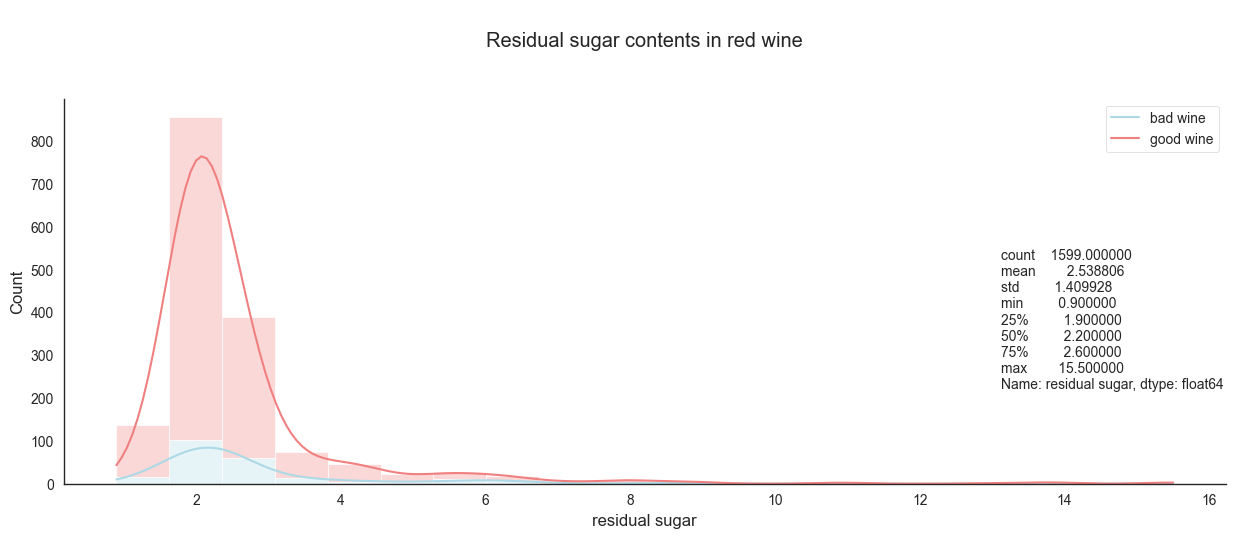

In [152]:
wine_visuals("residual sugar")

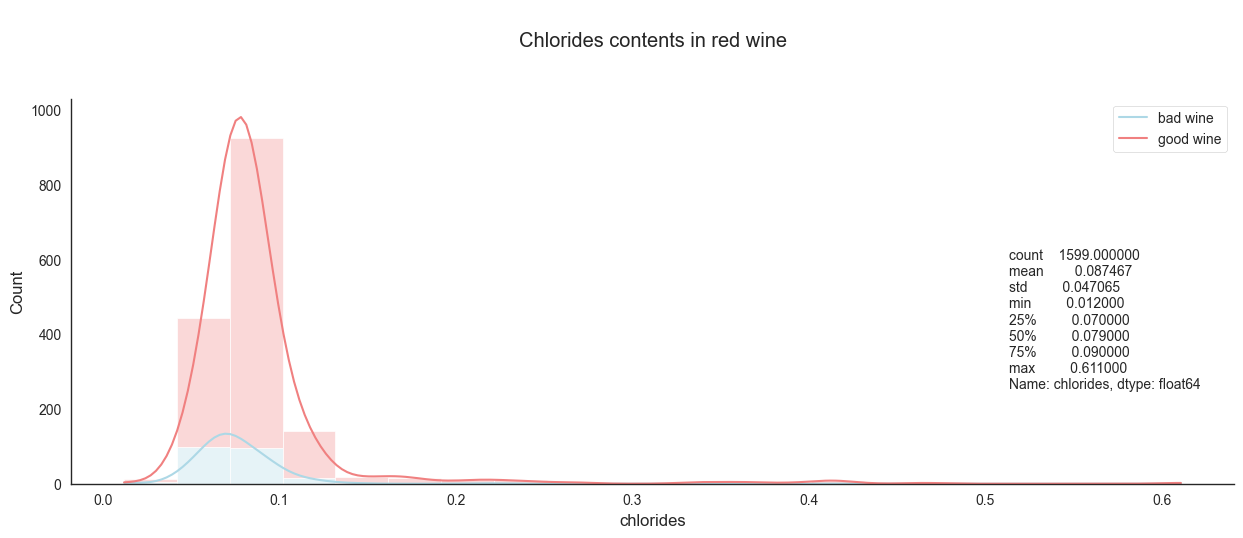

In [153]:
wine_visuals("chlorides")

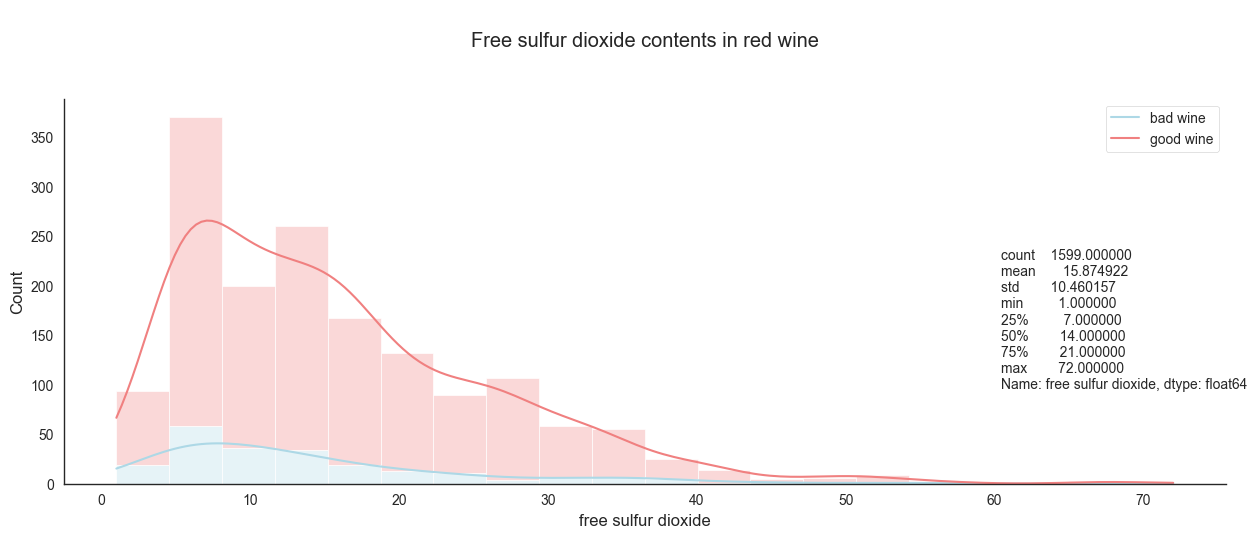

In [154]:
wine_visuals("free sulfur dioxide")

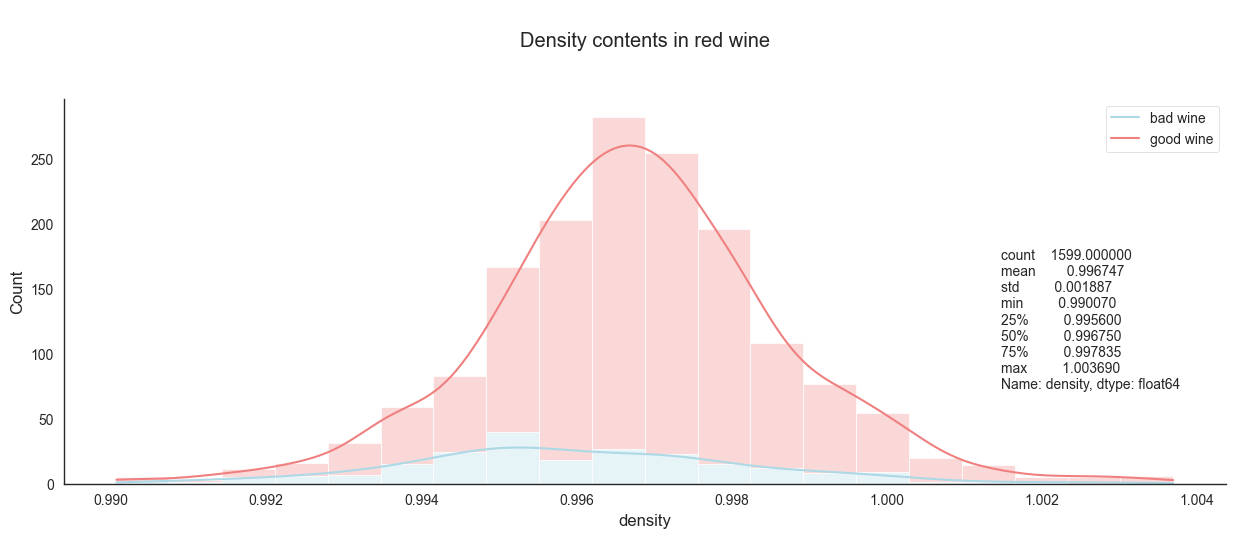

In [155]:
wine_visuals("density")

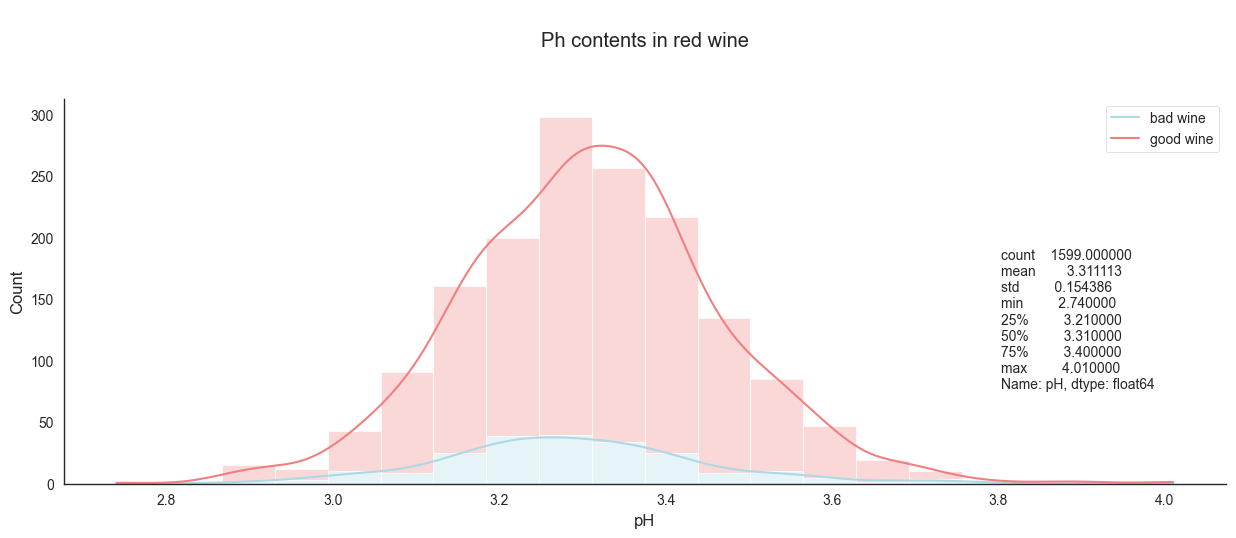

In [156]:
wine_visuals("pH")

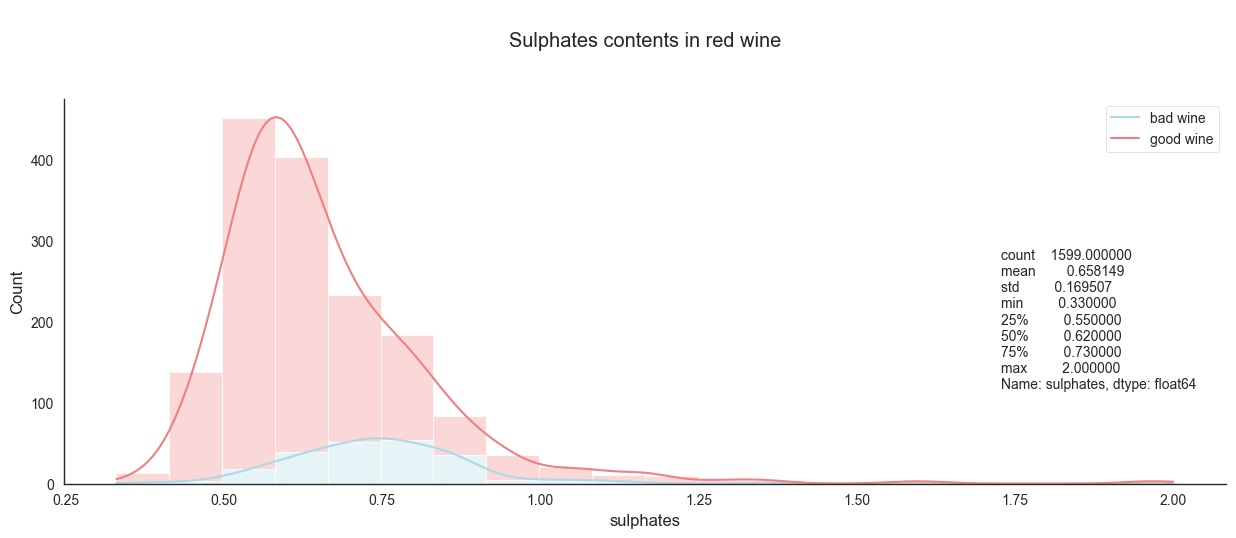

In [157]:
wine_visuals("sulphates")

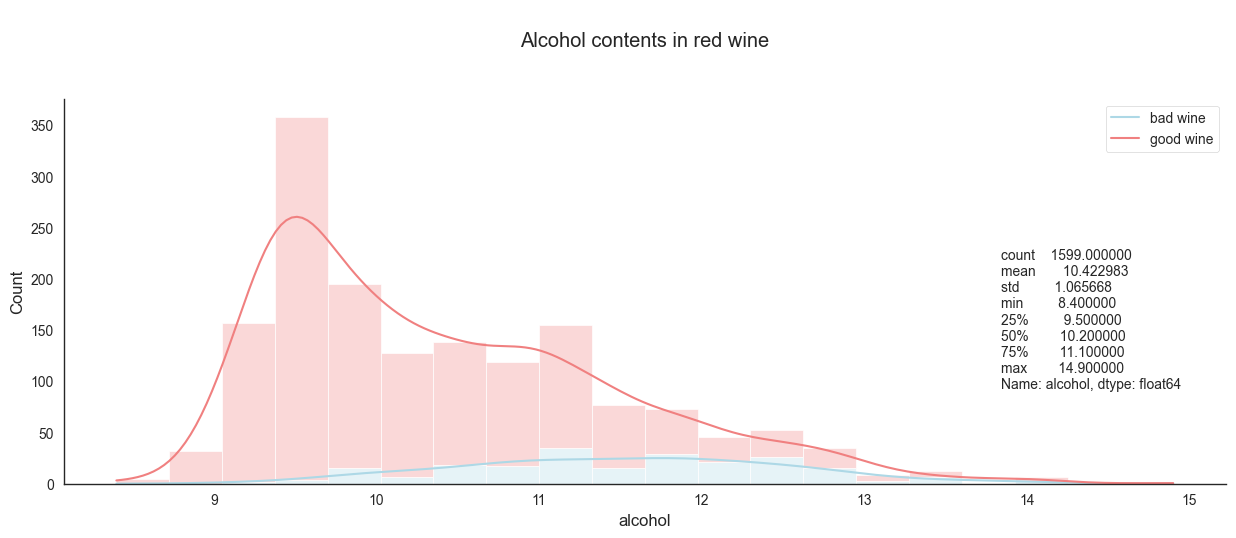

In [158]:
wine_visuals("alcohol")

In [159]:
df.corr(numeric_only=True).style.background_gradient(cmap=plt.cm.Spectral)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


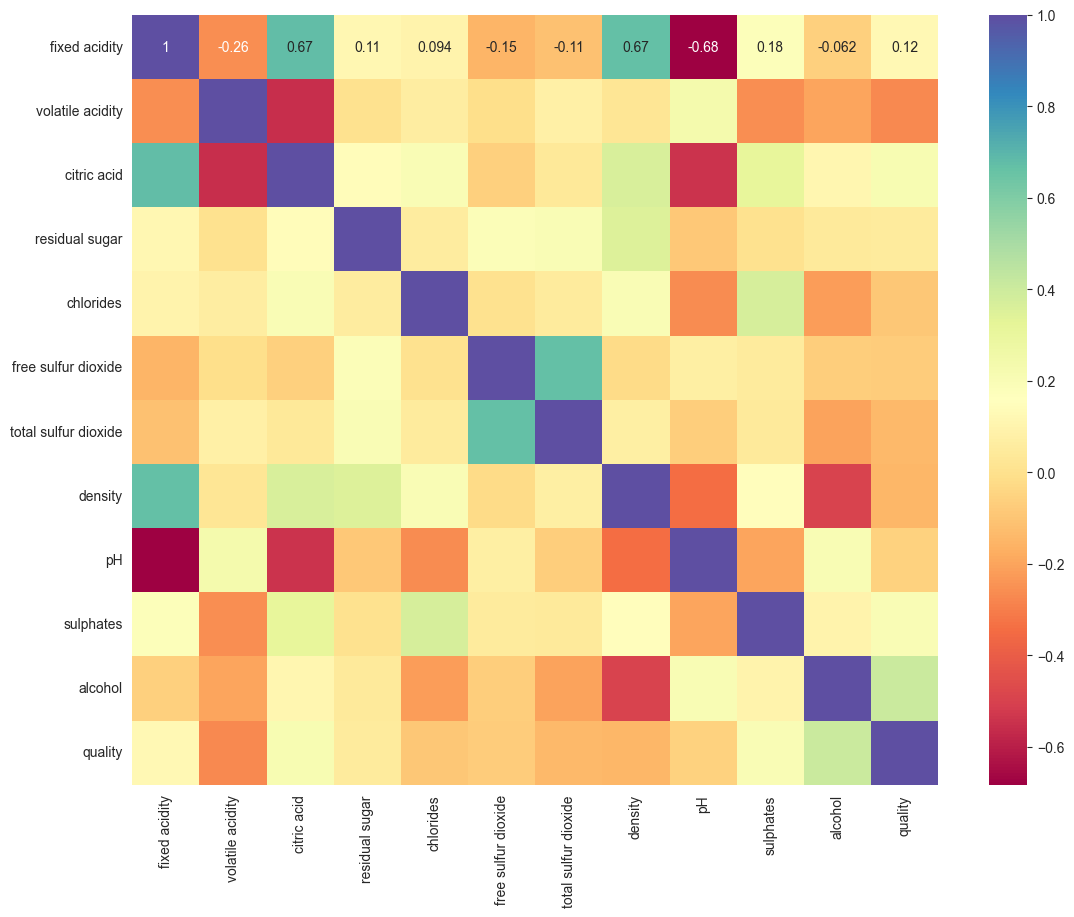

In [160]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=plt.cm.Spectral)
plt.show()

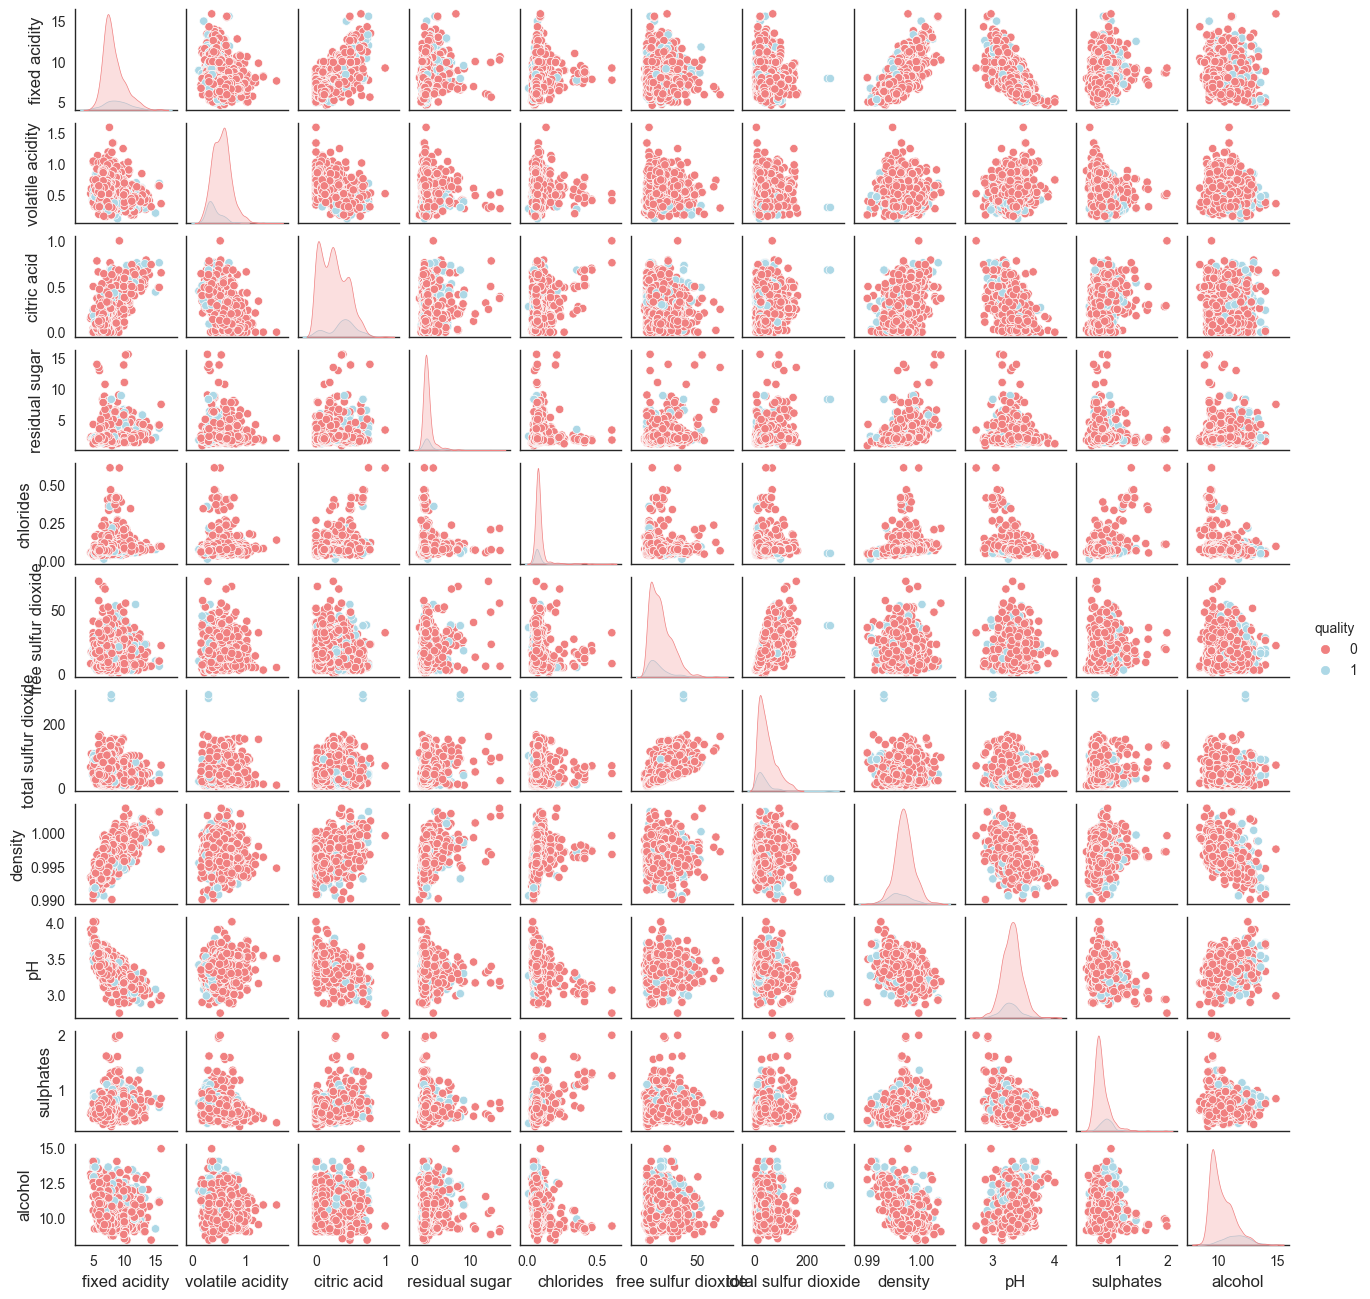

In [161]:
sns.pairplot(df, hue='quality', palette=palette, height=1.2, diag_kind = 'kde')
plt.show()